<a href="https://colab.research.google.com/github/risitadas/machine-learning-in-python/blob/main/33.knn-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Nearest Neighbor (KNN) Algorithm Classification : 

From sklearn.datasets load digits dataset and do following

i. classify digits (0 to 9) using KNN classifier, can use different values for k neighbors and need to figure out a value of K that gives you a maximum score,can manually try different values of K or use gridsearchcv
ii. plot confusion matrix
iii. plot classification report

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
df = pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 'columns'), df.target, test_size=0.3, random_state=10)

creating the KNN classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [14]:
len(X_train)

1257

In [15]:
len(X_test)

540

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
knn.score(X_test, y_test)

0.987037037037037

In [20]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
knn.score(X_test, y_test)

0.9814814814814815

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.score(X_test, y_test)

0.9907407407407407

after trying various values of k manually and K = 5 seems to my best option considering the number of folds too

In [28]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 53]])

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(42.0, 0.5, 'Truth')

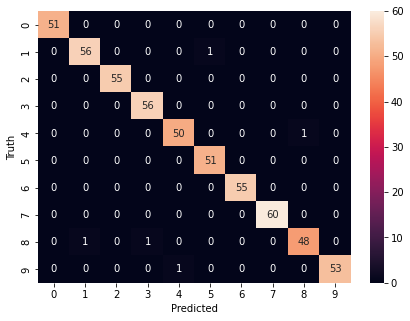

In [31]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       0.98      0.98      0.98        51
           5       0.98      1.00      0.99        51
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        60
           8       0.98      0.96      0.97        50
           9       1.00      0.98      0.99        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

